## Library Preparation

In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import warnings

## Data Preparation

In [2]:
#Upload Data
upload = files.upload()

Saving btc.csv to btc.csv


In [4]:
#Read Data
df = pd.read_csv("btc.csv", delimiter = ',')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...,...
2909,2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,25245861652,0,0
2910,2022-09-05,19988.789062,20031.160156,19673.046875,19812.371094,28813460025,0,0
2911,2022-09-06,19817.724609,20155.269531,18800.171875,18837.667969,43403978910,0,0
2912,2022-09-07,18837.683594,19427.171875,18644.466797,19290.324219,35239757134,0,0


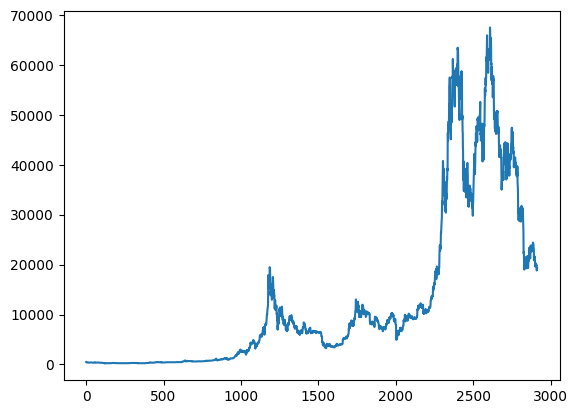

In [6]:
#Extract Kolom yang dibutuhkan
df1 = df[["Close"]].copy()

#Cek Type Data
df1.dtypes

#Visualisasi Data
plt.plot(df1['Close'])

## Stationary testing

In [7]:
#Augmented Dickey-Fuller Test
#H0 = Data Non-Stasioner
#Ha = Data Stasioner
#Jika p-value < 0.05 maka Data Stasioner

result = adfuller(df1['Close'])
print(result)
if result[1] < 0.05:
  print("Data Stasioner")
else:
  print("Data Non-Stasioner")

(np.float64(-1.6745475201593445), np.float64(0.44427175587336576), 28, 2885, {'1%': np.float64(-3.432618675186974), '5%': np.float64(-2.8625423474529024), '10%': np.float64(-2.5673035783905878)}, np.float64(46736.48770898788))
Data Non-Stasioner


In [8]:
#KPSS Test
#H0 = Data Stasioner
#Ha = Data Non-Stasioner
#Jika p-value < 0.05 maka Data Non-Stasioner

hasil_kpss = sm.tsa.stattools.kpss(df1, regression='ct')
print(hasil_kpss)
if hasil_kpss[1] < 0.05:
  print("Data Non-Stasioner")
else:
  print("Data Stasioner")

(np.float64(0.9025570947851198), np.float64(0.01), 31, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
Data Non-Stasioner


<ipython-input-8-5a3b9d1b0b21>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  hasil_kpss = sm.tsa.stattools.kpss(df1, regression='ct')


## Data Differencing

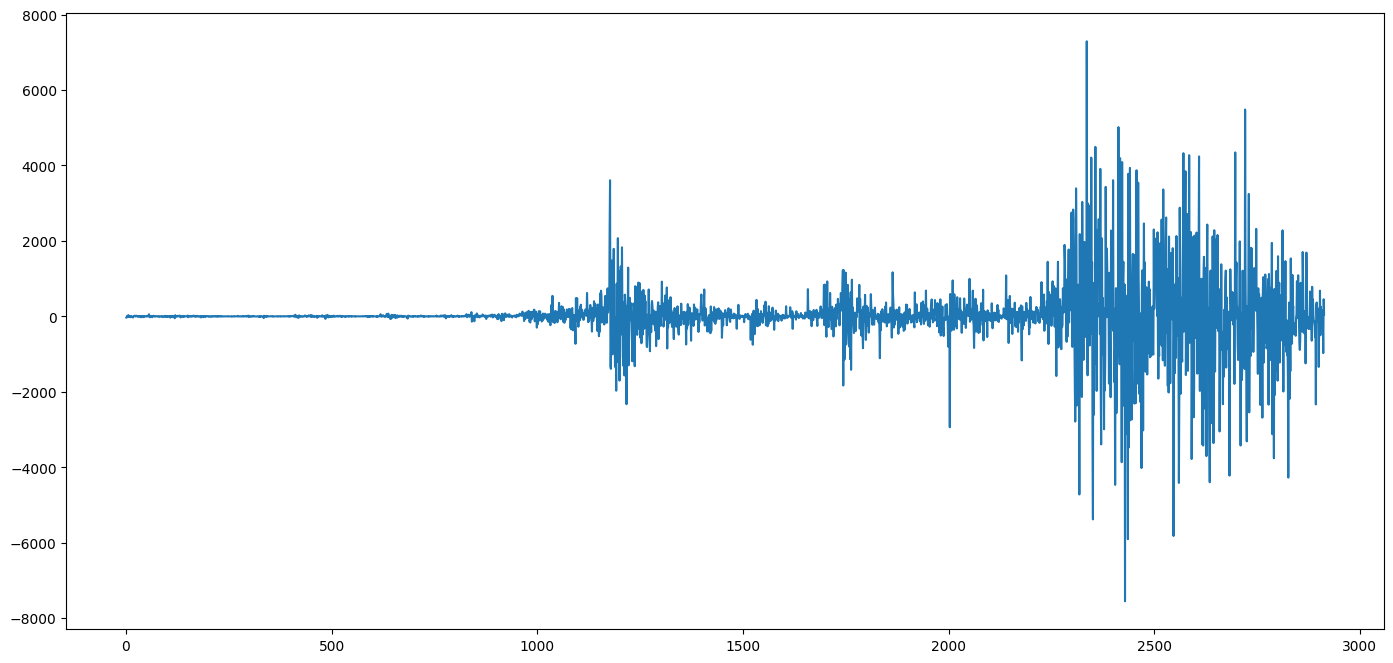

In [9]:
#Differencing Data 1 Kali
df1_diff = df['Close'].diff().dropna()

#Visualisasi Data
fig, ax = plt.subplots(figsize=(17,8),dpi=100)
ax.plot(df1_diff)

In [10]:
#Augmented Dickey-Fuller Test
result = adfuller(df1_diff)
print("ADF Test")
if result[1] < 0.05:
  print("Data Stasioner")
else:
  print("Data Non-Stasioner")

#KPSS Test

hasil_kpss = sm.tsa.stattools.kpss(df1_diff, regression='ct')
print("KPSS Test")
if hasil_kpss[1] < 0.05:
  print("Data Non-Stasioner")
else:
  print("Data Stasioner")

ADF Test
Data Stasioner
KPSS Test
Data Stasioner


<ipython-input-10-e349aa439b5c>:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  hasil_kpss = sm.tsa.stattools.kpss(df1_diff, regression='ct')


In [ ]:
#Differencing Data ke-2 (Optional)
df2_diff = df1_diff.diff().dropna()

#Visualisasi Data
fig, ax = plt.subplots(figsize=(17,8),dpi=100)
ax.plot(df2_diff)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


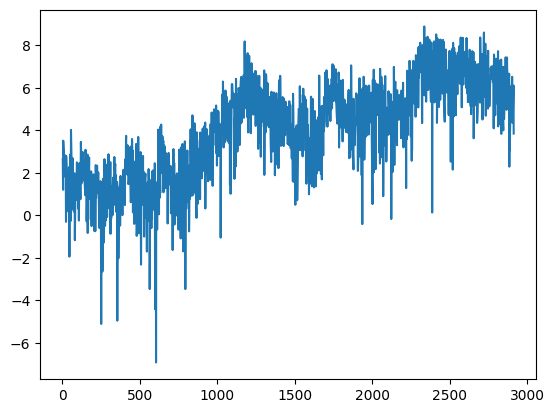

In [ ]:
#Transformasi Data (Optional)
log_df1 = np.log(df1_diff).dropna()

#Visualisasi Data
plt.plot(log_df1)

## Plotting of ACF and PACF

(-0.25, 0.25)

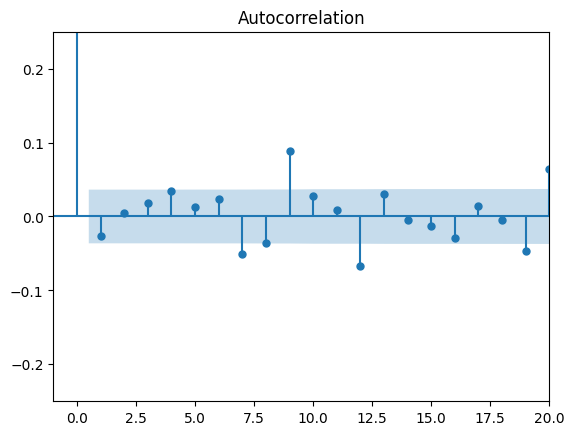

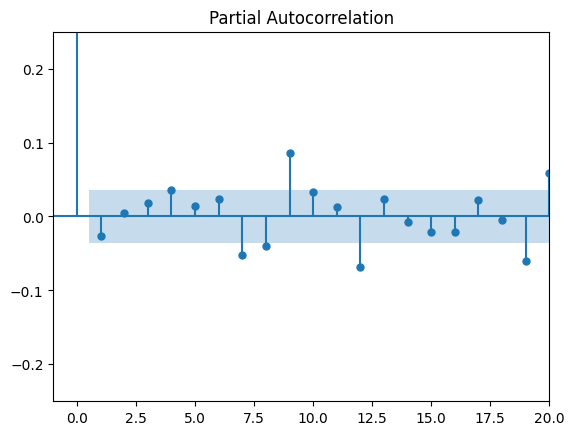

In [11]:
#Plot ACF
plot_acf(df1_diff)
plt.xlim([-1,20])
plt.ylim([-0.25,0.25])

#Plot PACF
plot_pacf(df1_diff)
plt.xlim([-1,20])
plt.ylim([-0.25,0.25])

## Diagnostic checking of the model

In [12]:
# Example: Simulated ARIMA or load your own time series
np.random.seed(42)
data = sm.tsa.arma_generate_sample(ar=[1, -0.5], ma=[1], nsample=100)

# Fit ARIMA(p,d,q)
model = ARIMA(data, order=(6, 1, 6))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(6, 1, 6)   Log Likelihood                -127.752
Date:                Thu, 24 Apr 2025   AIC                            281.503
Time:                        10:04:36   BIC                            315.240
Sample:                             0   HQIC                           295.153
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5229      0.303     -1.729      0.084      -1.116       0.070
ar.L2         -0.1441      0.295     -0.489      0.625      -0.721       0.433
ar.L3         -0.1234      0.294     -0.420      0.6

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


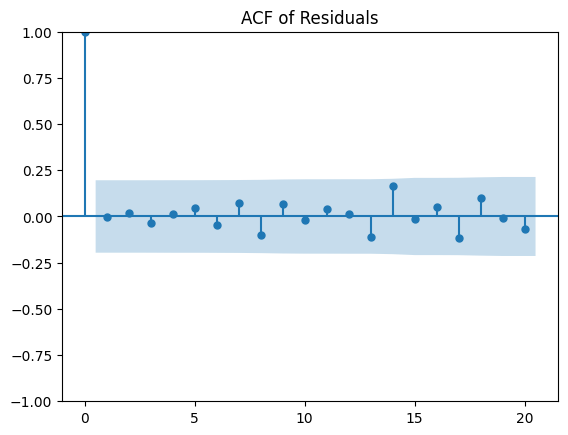

Ljung-Box Test:
      lb_stat  lb_pvalue
10  3.017601   0.981007


In [13]:
residuals = model_fit.resid
plot_acf(residuals, lags=20)
plt.title("ACF of Residuals")
plt.show()
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test:\n", lb_test)

## Forecasting Bitcoin prices for the next 7 days

In [14]:
warnings.filterwarnings("ignore")  # Hapus semua warning

# 1. Split data
dflog_train = df1_diff[:-7]
dflog_test = df1_diff[-7:]

# 2. Fit ARIMA(6,1,6)
model = ARIMA(dflog_train, order=(6, 1, 6))
model_fit = model.fit()

# 3. Forecast 7 steps ahead
forecast_diff = model_fit.forecast(steps=7)

# 4. Kembalikan nilai forecast ke bentuk semula
last_known_value = df1.iloc[len(dflog_train)]
forecast_reconstructed = [last_known_value]
for diff in forecast_diff:
    forecast_reconstructed.append(forecast_reconstructed[-1] + diff)

forecast_final = forecast_reconstructed[1:]

# 5. Tampilkan hasil tabel sederhana
actual_values = df1.iloc[-7:].values.flatten().tolist()
forecast_final = np.array(forecast_final).flatten().tolist()

df_output = pd.DataFrame({
    "Nilai Actual": actual_values,
    "Nilai Forecast": forecast_final
})

print(df_output)


   Nilai Actual  Nilai Forecast
0  19969.771484    20047.248064
1  19832.087891    20077.594165
2  19986.712891    20195.258426
3  19812.371094    20203.656944
4  18837.667969    20136.429209
5  19290.324219    20080.447427
6  19337.371094    20117.913671


## RMSE

In [15]:
# 5. Hitung RMSE
actual_values = df1.iloc[-7:].values.flatten().tolist()  # Nilai aktual dari data testing
forecast_final = np.array(forecast_final).flatten().tolist()  # Nilai prediksi dari ARIMA

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(actual_values, forecast_final))

# Tampilkan RMSE
print(f"RMSE: {rmse}")


RMSE: 674.345605051539
